In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
import urllib.request as url 
from bs4 import BeautifulSoup as bs
import requests


In [177]:
from textblob import TextBlob

In [50]:
import urllib.request as url 

In [65]:
html = "https://www.imdb.com/title/tt14016500/reviews?ref_=tt_urv"

In [66]:
html = url.urlopen(html).read()
html 

b'\n \n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>The Summer I Turned Pretty (TV Series 2022\xe2\x80\x93 ) - The Summer I Turned Pretty (TV Series 2022\xe2\x80\x93 ) - User Reviews - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "Lo

In [58]:
import requests
page = requests.get(html)
html_contents = page.text

In [67]:
soup = bs(html, 'html.parser')
soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>The Summer I Turned Pretty (TV Series 2022– ) - The Summer I Turned Pretty (TV Series 2022– ) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/title/tt14016500/reviews" rel="canonical"/>
<meta content="http://

In [68]:
text_file = soup.prettify()
text_file

'<!DOCTYPE html>\n<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">\n <head>\n  <meta charset="utf-8"/>\n  <script type="text/javascript">\n   var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};\n  </script>\n  <script>\n   if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <script>\n   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);\n  </script>\n  <title>\n   The Summer I Turned Pretty (TV Series 2022– ) - The Summer I Turned Pretty (TV Series 2022– ) - User Reviews - IMDb\n  </title>\n  <script>\n   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);\n  </script>\n  <script>\n   if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <script>\n   if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <link href=

In [69]:

file = open("movie_reviews_1.txt","w",encoding='utf-8')
file.writelines(text_file)

In [ ]:
div <div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<span>
                7
               </span>
               <span class="point-scale">
                /10
               </span>
<a class="title" href="/review/rw8271206/">
              Frustrating...but I couldn't stop watching
             </a>
        
        
             <div class="display-name-date">
              <span class="display-name-link">
               <a href="/user/ur71426052/">
                tanstorck
               </a>
              <div class="text show-more__control">
               Amongst the cliches, irritating characters, and the irritating choices they make, there is something comforting about this series. The soundtrack, stunning locations, colorful costumes, excellent casting, and all around solid performances make an otherwise unoriginal series quite entertaining....and by the way, I'm team Conrad.
              </div>

In [141]:
no_pages = 1
def get_data(pageNo, soup):
    alls = []
    for d in soup.findAll('div', attrs={'class':'lister-item-content'}):
        #print(d)

        rating = d.find('span', attrs={'class':'rating-other-user-rating'})
        #print(rating.text)
        #print(n[0]['alt'])
        #Title_r = d.findAll('div', attrs={'class':'lister-item-content'})
        #print(Title_r)
        Title = d.find('a', attrs={'class':'title'})
        print(Title.text)
        name = d.find('span', attrs={'class':'display-name-link'})
        review = d.find('div', attrs={'class':'text show-more__control'})
        
        all1=[]
        if name is not None:
            #print(n[0]['alt'])
            all1.append(name.text)
        else:
            all1.append("unknown-product")
            
        if Title is not None:
            #print(price.text)
            all1.append(Title.text)
        else:
            all1.append('0')
        alls.append(all1) 
        
        if rating is not None:
            rating_text = rating.text.strip('\n') 
            all1.append(rating_text)
        else:
            all1.append('-1')

        if review is not None:

            all1.append(review.text)
        else:
            all1.append('0')     

   
    return alls

In [142]:
result =get_data(1, soup)

 Frustrating...but I couldn't stop watching

 Sweet and fun but it's missing something

 Melded families spend yet another summer at the beach house.

 A subpar romance

 Are we suppose to like Belly?

 Written by adults who don't interact with teens

 What's happened to IMBD credibility

 Shallow horrible people with musical padding and summer setting

 The final? Did not get it

 Watch it for "Jeremiah"

 Thank you

 A great reminder to cancel Prime subscription

 A chick series for the teen/tween age group.

 It's a usual growing of age story yet it is still enjoyable and fun to watch.

 Braindead Teentrash

 Don't mind the trolls

 I sobbed like a baby

 Written by Grade-Schoolers

 This was truly very engaging and I was completely invested in all the characters. The series really manages to have heart and depth, while also being fun and sweet.

 I didn't care for the book, but the show is somehow worse.

 Obviously we aren't their target audience

 Unexpected And Exactly What I Ju

In [143]:
result

[['tanstorck',
  " Frustrating...but I couldn't stop watching\n",
  '7/10',
  "Amongst the cliches, irritating characters, and the irritating choices they make, there is something comforting about this series. The soundtrack, stunning locations, colorful costumes, excellent casting, and all around solid performances make an otherwise unoriginal series quite entertaining....and by the way, I'm team Conrad."],
 ['blebbe',
  " Sweet and fun but it's missing something\n",
  '6/10',
  "This is more like a 6.5/10 for me. It was a sweet and fun. I liked the setting and the chill beachy vibe. It was a pretty easy binge watch too. But it felt a little shallow and repetitive. I feel like we've seen this story many times already. And that's totally fine, but I just wished this series had had something more interesting that would have made it stand out from the other stories. Some of the interactions between the characters felt unnatural to me as well."],
 ['TxMike',
  ' Melded families spend yet 

In [145]:
result_df = pd.DataFrame(result)

In [146]:
result_df.columns = ['Name','Title','Rating','reviews']

In [147]:
result_df.head(100)

,Name,Title,Rating,reviews
0,tanstorck,Frustrating...but I couldn't stop watching\n,7/10,"Amongst the cliches, irritating characters, an..."
1,blebbe,Sweet and fun but it's missing something\n,6/10,This is more like a 6.5/10 for me. It was a sw...
2,TxMike,Melded families spend yet another summer at t...,-1,"Season Two, 2023: It is July 2023 and the seco..."
3,Mesina02,A subpar romance\n,5/10,I actually thought that this would have been a...
4,Manni7,Are we suppose to like Belly?\n,5/10,"Look, I like teen age-ish drama TV shows and b..."
5,ciarrawaffle,Written by adults who don't interact with tee...,2/10,Cliche. Everything seems to be written by adul...
6,daleykryochek,What's happened to IMBD credibility\n,3/10,When a show like this gets a 7.7 on IMBD the s...
7,Neucosa,Shallow horrible people with musical padding ...,3/10,"Terrible script. I did not read the books, but..."
8,andreaguecruz,The final? Did not get it\n,5/10,Can someone please tell me when did Belly brok...
9,kelley1231,"Watch it for ""Jeremiah""\n",9/10,Jeremiah is by far the best character of the s...


In [148]:
df = result_df.copy()

In [149]:
df.head()

,Name,Title,Rating,reviews
0,tanstorck,Frustrating...but I couldn't stop watching\n,7/10,"Amongst the cliches, irritating characters, an..."
1,blebbe,Sweet and fun but it's missing something\n,6/10,This is more like a 6.5/10 for me. It was a sw...
2,TxMike,Melded families spend yet another summer at t...,-1,"Season Two, 2023: It is July 2023 and the seco..."
3,Mesina02,A subpar romance\n,5/10,I actually thought that this would have been a...
4,Manni7,Are we suppose to like Belly?\n,5/10,"Look, I like teen age-ish drama TV shows and b..."


In [167]:
df = df.sort_values(by=['Rating'], ascending=True)

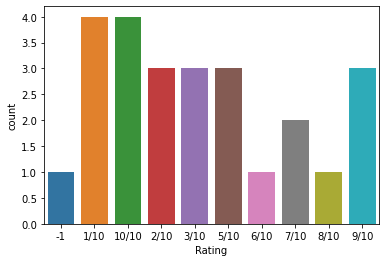

In [168]:
sns.countplot(x=df['Rating']) 

In [151]:
df.shape

(25, 4)

In [161]:
df['Rating_scaled']= df['Rating'].apply(lambda x: x.split('/')[0])

In [173]:
df['Rating_scaled'] = pd.to_numeric(df['Rating_scaled'])

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2 to 15
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           25 non-null     object
 1   Title          25 non-null     object
 2   Rating         25 non-null     object
 3   reviews        25 non-null     object
 4   Rating_scaled  25 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ KB


In [175]:
df.head(20)

,Name,Title,Rating,reviews,Rating_scaled
2,TxMike,Melded families spend yet another summer at t...,-1,"Season Two, 2023: It is July 2023 and the seco...",-1
14,StayEasy,Braindead Teentrash\n,1/10,Just a stupid lame story about a horny virgin ...,1
20,cqtiger-51415,Obviously we aren't their target audience\n,1/10,I thought this would be an easy watch after th...,1
23,piapiangco,Conrad Sucks\n,1/10,As said by somebody as I was scrolling through...,1
11,a_pospech,A great reminder to cancel Prime subscription\n,1/10,A completely generic shallow artificial story ...,1
22,Icestarfish-1,The perfect summer show\n,10/10,The perfect show to watch again and again in t...,10
16,vanessxisabelle,I sobbed like a baby\n,10/10,It's 4am and I just finished binging this show...,10
21,rockyservacio,Unexpected And Exactly What I Just Needed.\n,10/10,"Even though I haven't read the books, I still ...",10
18,Imme-van-Gorp,This was truly very engaging and I was comple...,10/10,"Season One: 9.5/10Themes: Drama, Family, Roman...",10
17,MissLittleSunshine,Written by Grade-Schoolers\n,2/10,I picked this to watch because I was looking f...,2


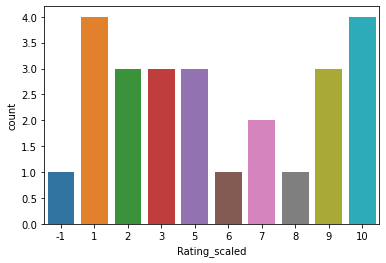

In [176]:
sns.countplot(x=df['Rating_scaled'])

In [179]:
df['sentiment'] = df['reviews'].apply(lambda x :TextBlob(x).sentiment.polarity)

In [180]:
df.head()

,Name,Title,Rating,reviews,Rating_scaled,sentiment
2,TxMike,Melded families spend yet another summer at t...,-1,"Season Two, 2023: It is July 2023 and the seco...",-1,0.175345
14,StayEasy,Braindead Teentrash\n,1/10,Just a stupid lame story about a horny virgin ...,1,-0.160606
20,cqtiger-51415,Obviously we aren't their target audience\n,1/10,I thought this would be an easy watch after th...,1,0.161111
23,piapiangco,Conrad Sucks\n,1/10,As said by somebody as I was scrolling through...,1,0.100000
11,a_pospech,A great reminder to cancel Prime subscription\n,1/10,A completely generic shallow artificial story ...,1,0.016667


In [186]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [187]:
df['sentiment_1'] = df['reviews'].apply(lambda x :sia.polarity_scores(x))

In [188]:
df.head()

,Name,Title,Rating,reviews,Rating_scaled,sentiment,sentiment_1
2,TxMike,Melded families spend yet another summer at t...,-1,"Season Two, 2023: It is July 2023 and the seco...",-1,0.175345,"{'neg': 0.033, 'neu': 0.821, 'pos': 0.146, 'co..."
14,StayEasy,Braindead Teentrash\n,1/10,Just a stupid lame story about a horny virgin ...,1,-0.160606,"{'neg': 0.253, 'neu': 0.617, 'pos': 0.13, 'com..."
20,cqtiger-51415,Obviously we aren't their target audience\n,1/10,I thought this would be an easy watch after th...,1,0.161111,"{'neg': 0.155, 'neu': 0.694, 'pos': 0.151, 'co..."
23,piapiangco,Conrad Sucks\n,1/10,As said by somebody as I was scrolling through...,1,0.100000,"{'neg': 0.037, 'neu': 0.814, 'pos': 0.149, 'co..."
11,a_pospech,A great reminder to cancel Prime subscription\n,1/10,A completely generic shallow artificial story ...,1,0.016667,"{'neg': 0.054, 'neu': 0.65, 'pos': 0.295, 'com..."


In [199]:
df['compound']=df['sentiment_1'].apply(lambda score_dict:score_dict['compound'])

In [200]:
df.head()

,Name,Title,Rating,reviews,Rating_scaled,sentiment,sentiment_1,compound
2,TxMike,Melded families spend yet another summer at t...,-1,"Season Two, 2023: It is July 2023 and the seco...",-1,0.175345,"{'neg': 0.033, 'neu': 0.821, 'pos': 0.146, 'co...",0.9931
14,StayEasy,Braindead Teentrash\n,1/10,Just a stupid lame story about a horny virgin ...,1,-0.160606,"{'neg': 0.253, 'neu': 0.617, 'pos': 0.13, 'com...",-0.6553
20,cqtiger-51415,Obviously we aren't their target audience\n,1/10,I thought this would be an easy watch after th...,1,0.161111,"{'neg': 0.155, 'neu': 0.694, 'pos': 0.151, 'co...",-0.2910
23,piapiangco,Conrad Sucks\n,1/10,As said by somebody as I was scrolling through...,1,0.100000,"{'neg': 0.037, 'neu': 0.814, 'pos': 0.149, 'co...",0.7430
11,a_pospech,A great reminder to cancel Prime subscription\n,1/10,A completely generic shallow artificial story ...,1,0.016667,"{'neg': 0.054, 'neu': 0.65, 'pos': 0.295, 'com...",0.8720


In [207]:
def assign_polar(sent):
    print(sent)
    sentiment_labels = 'unknown'
    compound_score = sent['compound']
    if compound_score >= 0.05:
        sentiment_labels= 'Positive'
    elif compound_score <= -0.05:
        sentiment_labels= 'Negative'
    else:
        sentiment_labels= 'Neutral'
    return sentiment_labels

In [209]:
df['score']=df['compound'].apply(lambda x:'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

In [210]:
df.head()

,Name,Title,Rating,reviews,Rating_scaled,sentiment,sentiment_1,compound,score
2,TxMike,Melded families spend yet another summer at t...,-1,"Season Two, 2023: It is July 2023 and the seco...",-1,0.175345,"{'neg': 0.033, 'neu': 0.821, 'pos': 0.146, 'co...",0.9931,Positive
14,StayEasy,Braindead Teentrash\n,1/10,Just a stupid lame story about a horny virgin ...,1,-0.160606,"{'neg': 0.253, 'neu': 0.617, 'pos': 0.13, 'com...",-0.6553,Negative
20,cqtiger-51415,Obviously we aren't their target audience\n,1/10,I thought this would be an easy watch after th...,1,0.161111,"{'neg': 0.155, 'neu': 0.694, 'pos': 0.151, 'co...",-0.2910,Negative
23,piapiangco,Conrad Sucks\n,1/10,As said by somebody as I was scrolling through...,1,0.100000,"{'neg': 0.037, 'neu': 0.814, 'pos': 0.149, 'co...",0.7430,Positive
11,a_pospech,A great reminder to cancel Prime subscription\n,1/10,A completely generic shallow artificial story ...,1,0.016667,"{'neg': 0.054, 'neu': 0.65, 'pos': 0.295, 'com...",0.8720,Positive


In [211]:
df_final = df.copy()

In [212]:
df_final.drop(columns = ['sentiment_1','Rating','Title'], inplace = True)

In [213]:
df_final.head()

,Name,reviews,Rating_scaled,sentiment,compound,score
2,TxMike,"Season Two, 2023: It is July 2023 and the seco...",-1,0.175345,0.9931,Positive
14,StayEasy,Just a stupid lame story about a horny virgin ...,1,-0.160606,-0.6553,Negative
20,cqtiger-51415,I thought this would be an easy watch after th...,1,0.161111,-0.2910,Negative
23,piapiangco,As said by somebody as I was scrolling through...,1,0.100000,0.7430,Positive
11,a_pospech,A completely generic shallow artificial story ...,1,0.016667,0.8720,Positive


In [214]:
postive = df_final.loc[df_final['score'] == 'Positive']

In [216]:
postive.shape

(20, 6)

In [217]:
df_final['score'].value_counts()

Positive    20
Negative     5
Name: score, dtype: int64

In [218]:
postive.head(20)

,Name,reviews,Rating_scaled,sentiment,compound,score
2,TxMike,"Season Two, 2023: It is July 2023 and the seco...",-1,0.175345,0.9931,Positive
23,piapiangco,As said by somebody as I was scrolling through...,1,0.100000,0.7430,Positive
11,a_pospech,A completely generic shallow artificial story ...,1,0.016667,0.8720,Positive
22,Icestarfish-1,The perfect show to watch again and again in t...,10,0.441667,0.9857,Positive
16,vanessxisabelle,It's 4am and I just finished binging this show...,10,0.138216,0.9833,Positive
21,rockyservacio,"Even though I haven't read the books, I still ...",10,0.200824,0.8776,Positive
18,Imme-van-Gorp,"Season One: 9.5/10Themes: Drama, Family, Roman...",10,0.250000,0.5994,Positive
12,Avidviewer-02847,"Cliched script and soapy, a lot of new young a...",3,0.387273,0.8126,Positive
7,Neucosa,"Terrible script. I did not read the books, but...",3,-0.094345,0.8922,Positive
6,daleykryochek,When a show like this gets a 7.7 on IMBD the s...,3,-0.200000,0.3527,Positive


In [219]:
negative = df_final.loc[df_final['score'] != 'Positive']

In [220]:
negative.head()

,Name,reviews,Rating_scaled,sentiment,compound,score
14,StayEasy,Just a stupid lame story about a horny virgin ...,1,-0.160606,-0.6553,Negative
20,cqtiger-51415,I thought this would be an easy watch after th...,1,0.161111,-0.2910,Negative
17,MissLittleSunshine,I picked this to watch because I was looking f...,2,0.062390,-0.3063,Negative
5,ciarrawaffle,Cliche. Everything seems to be written by adul...,2,-0.375000,-0.4767,Negative
19,cindyleveillee,"I just finished the book last night, and to be...",2,0.061614,-0.8577,Negative


In [221]:
negative.to_csv('negative.csv')

In [222]:
postive.to_csv('postive.csv')